# Decision Trees

**author** : Germain Forestier (germain.forestier@uha.fr)

Decision Trees are a popular supervised learning algorithm used for both classification and regression tasks. They work by recursively splitting the dataset based on conditions, forming a tree-like model of decisions.

- **Decision Node**: Splits the data based on a condition.
- **Leaf Node**: Represents the outcome or target value.
- **Pruning**: Removes unnecessary branches to prevent overfitting.

Benefits include simplicity and flexibility, but they can be prone to overfitting without proper tuning. In this notebook, we'll delve deeper into how to implement and evaluate Decision Trees.


## **Exercise 1**: Computing Information Gain

Given the dataset at `germain-forestier.info/dataset/weather.csv`, your task is to create a function that computes the information gain for each feature in the dataset.

### Part 1: Load the dataset

Use the pandas library to load the dataset from the provided URL.

In [ ]:
import pandas as pd

# TODO: Load the dataset into a DataFrame named 'data'
data = None


 #### Correction :

In [ ]:
import pandas as pd

# Expected code
data = pd.read_csv("https://germain-forestier.info/dataset/weather.csv")
data.head()


,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


### Part 2: Compute Entropy of the Target Column

Implement a function named `compute_entropy` that calculates the entropy of a given series.


In [ ]:
import numpy as np

def compute_entropy(series):
    # TODO: Calculate the entropy of the series
    entropy = None
    return entropy


 #### Correction :

In [ ]:
import numpy as np

def compute_entropy(series):
    classes, counts = np.unique(series, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

entropy_target = compute_entropy(data["Play"])
entropy_target


0.9402859586706311

### Part 3: Compute Information Gain for Each Feature

Implement a function named `compute_information_gain` which computes the information gain of a feature relative to the target column.


In [ ]:
def compute_information_gain(data, feature, target):
    # TODO: Calculate the information gain for the feature with respect to the target
    info_gain = None
    return info_gain


 #### Correction :

In [ ]:
def compute_information_gain(data, feature, target):
    unique_values = data[feature].unique()
    total_entropy = compute_entropy(data[target])
    weighted_entropy = sum([(len(data[data[feature] == val]) / len(data)) * compute_entropy(data[data[feature] == val][target]) for val in unique_values])
    info_gain = total_entropy - weighted_entropy
    return info_gain

features = ['Outlook', 'Temperature', 'Humidity', 'Wind']
info_gains = {feature: compute_information_gain(data, feature, "Play") for feature in features}
info_gains


{'Outlook': 0.24674981977443933,
 'Temperature': 0.02922256565895487,
 'Humidity': 0.15183550136234159,
 'Wind': 0.04812703040826949}

## **Exercice 2**: Decision Trees using Scikit-learn

In this exercise, we'll be using `scikit-learn` to build a decision tree for our `weather.csv` dataset.

### Part 1: Preprocessing the Dataset

Decision Trees in `scikit-learn` cannot handle categorical variables directly. Thus, we need to convert them into numerical format. One of the most common approaches for this task is One-Hot Encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# TODO: Apply one-hot encoding to the data excluding the target column
encoded_data = None


 #### Correction :

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoded_values = encoder.fit_transform(data.drop(columns=["Play"])).toarray()
column_names = encoder.get_feature_names_out(input_features=data.columns[:-1])
encoded_data = pd.DataFrame(encoded_values, columns=column_names)
encoded_data["Play"] = data["Play"]
encoded_data.head()


,Outlook_Rain,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak,Play
0,0.0,1.0,1.0,0.0,0.0,1.0,No
1,0.0,1.0,1.0,0.0,0.0,0.0,No
2,0.0,0.0,1.0,0.0,0.0,1.0,Yes
3,1.0,0.0,0.0,1.0,0.0,1.0,Yes
4,1.0,0.0,0.0,0.0,1.0,1.0,Yes


### Part 2: Splitting the Dataset

We'll split our dataset into training and testing subsets to validate the performance of our model.


In [ ]:
from sklearn.model_selection import train_test_split

# TODO: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = None, None, None, None


 #### Correction :

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop(columns=["Play"])
y = encoded_data["Play"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Part 3: Train the Decision Tree Classifier

Let's proceed to train our Decision Tree model using the training data.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the DecisionTreeClassifier and fit it to the training data
clf = None


 #### Correction :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

### Part 4: Visualize the Decision Tree

Visualizing the tree can help in understanding how the tree has decided to split based on feature values.


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# TODO: Plot the trained decision tree


 #### Correction :

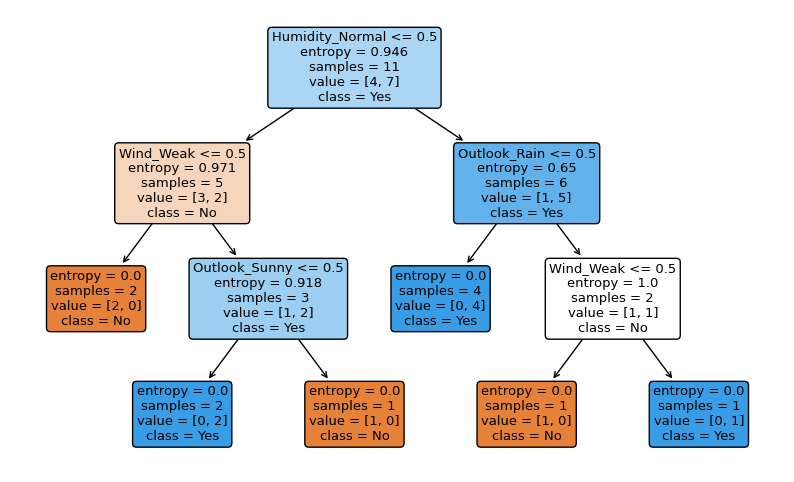

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()


### Part 5: Evaluate the Model

We'll measure the accuracy of our model using the testing subset.


In [ ]:
from sklearn.metrics import accuracy_score

# TODO: Predict the outcomes for the test set and calculate the accuracy
test_accuracy = None


 #### Correction :

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy


0.6666666666666666

Explore ways to improve the performances.

## **Exercice 3**: Visualizing Decision Boundaries of Decision Trees

In this exercice, we will visualize how decision boundaries change as we increase the depth of a Decision Tree using the `make_moons` dataset.


### Part 1: Generate the `make_moons` Dataset with 100 samples and noise set to 0.25


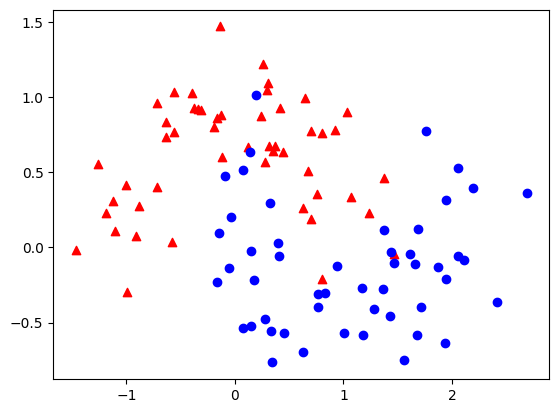

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# Plotting the dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o')
plt.show()


### Part 2: Apply Decision Tree and Visualize Boundaries: Depth 1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# TODO: Apply Decision Tree with depth of 1 and plot its decision boundary


 #### Correction :

In [ ]:
def visualize_boundary(clf, depth, X, y):
    plt.figure(figsize=(8, 5))

    # Decision Tree Visualization
    plt.subplot(1, 2, 1)
    plot_tree(clf, filled=True, rounded=True)

    # Decision Boundary Visualization
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1, 2, 2)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o')
    plt.title(f"Depth {depth}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-1.5, 1.5, 100))


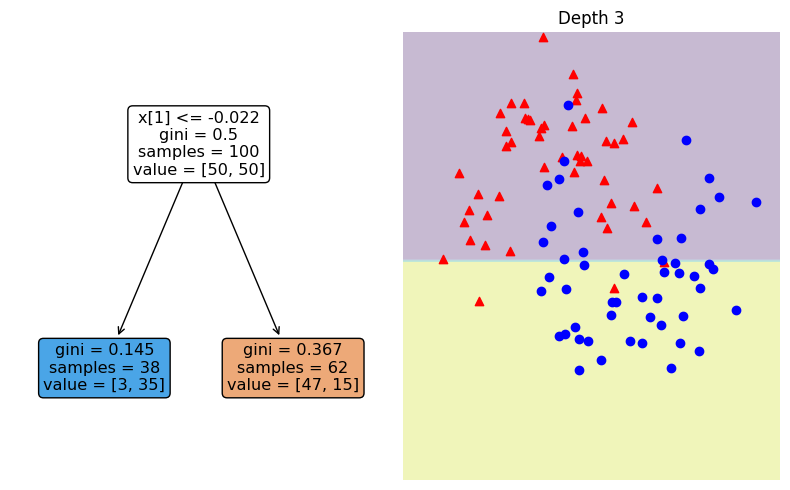

In [ ]:
# Expected code for Depth 1
clf_depth_3 = DecisionTreeClassifier(max_depth=1, random_state=42)
clf_depth_3.fit(X, y)
visualize_boundary(clf_depth_3, 3, X, y)


### Part 3: Apply Decision Tree and Visualize Boundaries with depth 2 and 9

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# TODO: Apply Decision Tree with depth of 2 and 9 and plot its decision boundary


 #### Correction :

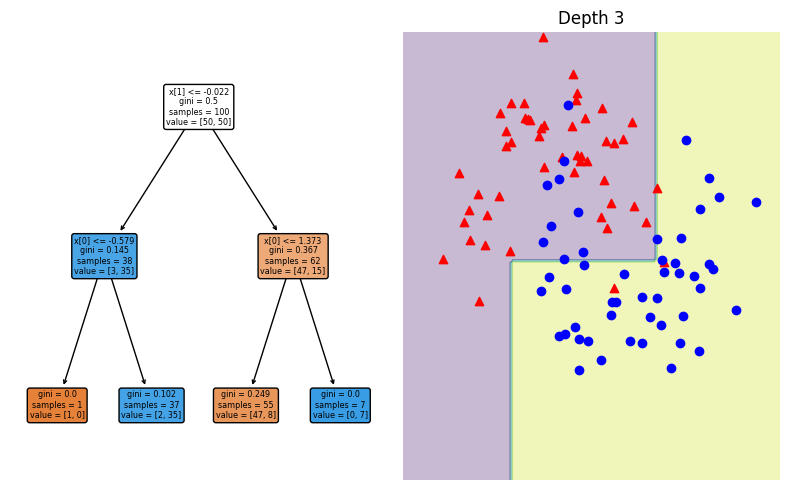

In [ ]:
# Expected code for Depth 2
clf_depth_3 = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_depth_3.fit(X, y)
visualize_boundary(clf_depth_3, 3, X, y)


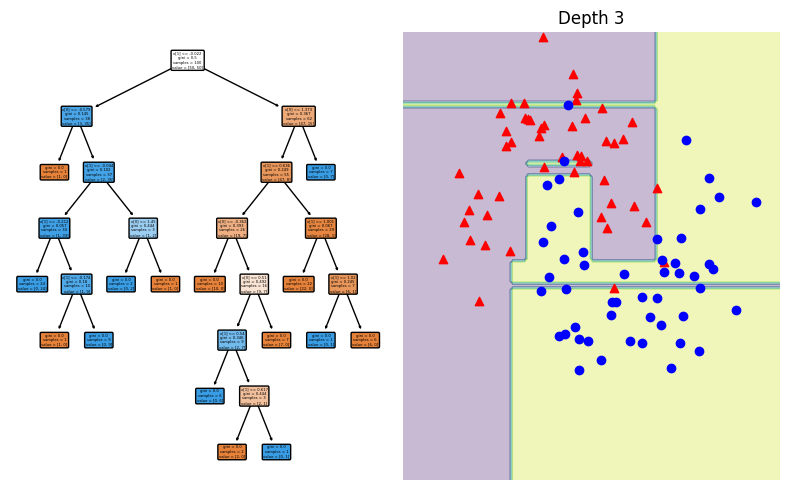

In [ ]:
# Expected code for Depth 9
clf_depth_3 = DecisionTreeClassifier(max_depth=9, random_state=42)
clf_depth_3.fit(X, y)
visualize_boundary(clf_depth_3, 3, X, y)


## **Exercice 4**: Introduction to Random Forests

In this exercise, you will implement a simple Random Forest model using `scikit-learn` and explore how it works.

### Step 1: Import Necessary Libraries

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Load and Prepare the Dataset

In [ ]:
# Step 2: Load and Prepare the Dataset
# For simplicity, let's use the famous Iris dataset


# Split the dataset into training and testing sets

 #### Correction :

In [ ]:
# Step 2: Load and Prepare the Dataset
# For simplicity, let's use the famous Iris dataset
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Train a Random Forest Model

In [ ]:
# Step 3: Train a Random Forest Model
# Initialize the Random Forest classifier with default parameters


# Train the model on the training data

 #### Correction :

In [ ]:
# Step 3: Train a Random Forest Model
# Initialize the Random Forest classifier with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 4: Make Predictions and Evaluate the Model

In [ ]:
# Step 4: Make Predictions and Evaluate the Model
# Make predictions on the test data


# Calculate the accuracy


# Display the confusion matrix


# Display the classification report

 #### Correction :

In [ ]:
# Step 4: Make Predictions and Evaluate the Model
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Step 5: Explore Feature Importance

In [ ]:
# Step 5: Explore Feature Importance
# Random Forests can be used to evaluate the importance of features


 #### Correction :

In [ ]:
# Step 5: Explore Feature Importance
# Random Forests can be used to evaluate the importance of features
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


### Step 6: Visualize a Single Tree from the Random Forest

In [ ]:
# Step 6: Visualize a Single Tree from the Random Forest


# Plot a single tree from the forest


 #### Correction :

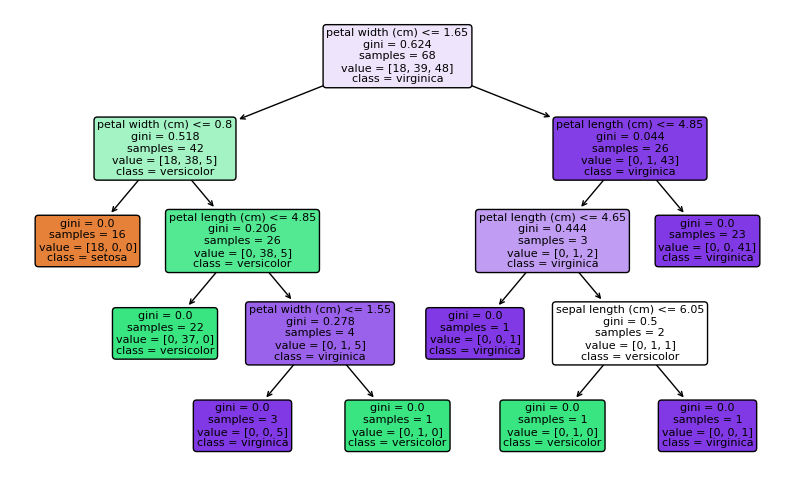

In [ ]:
# Step 6: Visualize a Single Tree from the Random Forest
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot a single tree from the forest
plt.figure(figsize=(10, 6))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True)
plt.show()
